# ProsperLoan Data 
## by EZE IFEANYI

## Introduction
>  This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
# Table of Contents 
<ul>
<li><a href="#UE">Univariate Exploration</a></li>
<li><a href="#BE">Bivariate Exploration</a></li>
<li><a href="#ME">Multivariate Exploration</a></li>
</ul>


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
loan = pd.read_csv(r"prosperLoanData.csv")
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [6]:
loan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

### What is the structure of your dataset?

> There are 113937 rows and 81 columns. Some columns need to be renamed and their data type changed and some dropped which are not relevant for my analysis.
### What is/are the main feature(s) of interest in your dataset?

> The main feature(s) of interest in the ProsperLoan dataset is tyring to understand what factors affect the Borrowers rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that will help in this dataset are:
- EmploymentStatus
- BorrowerState
- BorrowerRate
- Credit Score(CreditScoreRangeLower, CreditScoreRangeUpper)
- Type of Loan(ListingCategory (numeric))
- ProsperScore
- IncomeRange
- LoanCurrentDaysDelinquent
- MonthlyLoanPayment
- BorrowerAPR
- Home Location(IsBorrowerHomeowner)
- Loan Term(Term)
- Occupation
- EmploymentStatusDuration
- StatedMonthlyIncome


First chart: We can notice that an Income Range large than 100.000 dolars have a Estimated Loss lower than the others Income Ranges. An income higher than 50.000 dolars have an estimated loss lower than 10%. Not employed, zero income and an income until 24.999 dolars have a mean of estimated loss higher than 10%, but lower than 15%.

Second chart: Is very interesting see how Prosper score is not necessarily correlated with higher incomes. When it comes to loan volume, there is a drop in the amount of credit for ratings above 8. Credit request volumes are concentrated in ratings from 4 to 7

# Cleaning
- Making the column header all lower case
- Renaming some columns
- Making the Employment status a categorial column

In [7]:
# Selecting the required columns
loan_data = loan[["CreditGrade","IsBorrowerHomeowner","BorrowerRate","BorrowerAPR","Term","ListingCategory (numeric)","CreditScoreRangeLower","CreditScoreRangeUpper","Occupation","BorrowerState"
                 ,"EmploymentStatus","EmploymentStatusDuration","StatedMonthlyIncome","MonthlyLoanPayment","ProsperScore","LoanCurrentDaysDelinquent","IncomeRange"]]

In [8]:
# Loading the data
loan_data.head()

,CreditGrade,IsBorrowerHomeowner,BorrowerRate,BorrowerAPR,Term,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,Occupation,BorrowerState,EmploymentStatus,EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,ProsperScore,LoanCurrentDaysDelinquent,IncomeRange
0,C,True,0.1580,0.16516,36,0,640.0,659.0,Other,CO,Self-employed,2.0,3083.333333,330.43,NaN,0,"$25,000-49,999"
1,NaN,False,0.0920,0.12016,36,2,680.0,699.0,Professional,CO,Employed,44.0,6125.000000,318.93,7.0,0,"$50,000-74,999"
2,HR,False,0.2750,0.28269,36,0,480.0,499.0,Other,GA,Not available,NaN,2083.333333,123.32,NaN,0,Not displayed
3,NaN,True,0.0974,0.12528,36,16,800.0,819.0,Skilled Labor,GA,Employed,113.0,2875.000000,321.45,9.0,0,"$25,000-49,999"
4,NaN,True,0.2085,0.24614,36,2,680.0,699.0,Executive,MN,Employed,44.0,9583.333333,563.97,4.0,0,"$100,000+"


In [9]:
# Checking the information
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   IsBorrowerHomeowner        113937 non-null  bool   
 2   BorrowerRate               113937 non-null  float64
 3   BorrowerAPR                113912 non-null  float64
 4   Term                       113937 non-null  int64  
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   CreditScoreRangeLower      113346 non-null  float64
 7   CreditScoreRangeUpper      113346 non-null  float64
 8   Occupation                 110349 non-null  object 
 9   BorrowerState              108422 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  EmploymentStatusDuration   106312 non-null  float64
 12  StatedMonthlyIncome        113937 non-null  float64
 13  MonthlyLoanPayment         11

# 1. Making the column header all lower case
### Code

In [10]:
# Making the column headers all lower case
loan_data.columns = map(str.lower, loan_data.columns)

In [11]:
# Viewing the columns
loan_data.head()

,creditgrade,isborrowerhomeowner,borrowerrate,borrowerapr,term,listingcategory (numeric),creditscorerangelower,creditscorerangeupper,occupation,borrowerstate,employmentstatus,employmentstatusduration,statedmonthlyincome,monthlyloanpayment,prosperscore,loancurrentdaysdelinquent,incomerange
0,C,True,0.1580,0.16516,36,0,640.0,659.0,Other,CO,Self-employed,2.0,3083.333333,330.43,NaN,0,"$25,000-49,999"
1,NaN,False,0.0920,0.12016,36,2,680.0,699.0,Professional,CO,Employed,44.0,6125.000000,318.93,7.0,0,"$50,000-74,999"
2,HR,False,0.2750,0.28269,36,0,480.0,499.0,Other,GA,Not available,NaN,2083.333333,123.32,NaN,0,Not displayed
3,NaN,True,0.0974,0.12528,36,16,800.0,819.0,Skilled Labor,GA,Employed,113.0,2875.000000,321.45,9.0,0,"$25,000-49,999"
4,NaN,True,0.2085,0.24614,36,2,680.0,699.0,Executive,MN,Employed,44.0,9583.333333,563.97,4.0,0,"$100,000+"


# 2. Renaming some columns
### Code

In [12]:
loan_data.rename(columns={"listingcategory (numeric)":"listingcategory_numeric",
                 "borrowerstate":"borrower_state","incomerange":"income_range",
                 "employmentstatus":"employment_status","employmentstatusduration":"employment_status_duration",
                          "creditscorerangelower":"credit_scorerange_lower",
                          "creditscorerangeupper":"credit_scorerange_upper","borrowerrate":"borrower_rate","borrowerapr":"borrower_apr"}, inplace =True);

In [13]:
# viewing the data
loan_data.head()

,creditgrade,isborrowerhomeowner,borrower_rate,borrower_apr,term,listingcategory_numeric,credit_scorerange_lower,credit_scorerange_upper,occupation,borrower_state,employment_status,employment_status_duration,statedmonthlyincome,monthlyloanpayment,prosperscore,loancurrentdaysdelinquent,income_range
0,C,True,0.1580,0.16516,36,0,640.0,659.0,Other,CO,Self-employed,2.0,3083.333333,330.43,NaN,0,"$25,000-49,999"
1,NaN,False,0.0920,0.12016,36,2,680.0,699.0,Professional,CO,Employed,44.0,6125.000000,318.93,7.0,0,"$50,000-74,999"
2,HR,False,0.2750,0.28269,36,0,480.0,499.0,Other,GA,Not available,NaN,2083.333333,123.32,NaN,0,Not displayed
3,NaN,True,0.0974,0.12528,36,16,800.0,819.0,Skilled Labor,GA,Employed,113.0,2875.000000,321.45,9.0,0,"$25,000-49,999"
4,NaN,True,0.2085,0.24614,36,2,680.0,699.0,Executive,MN,Employed,44.0,9583.333333,563.97,4.0,0,"$100,000+"


In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   creditgrade                 28953 non-null   object 
 1   isborrowerhomeowner         113937 non-null  bool   
 2   borrower_rate               113937 non-null  float64
 3   borrower_apr                113912 non-null  float64
 4   term                        113937 non-null  int64  
 5   listingcategory_numeric     113937 non-null  int64  
 6   credit_scorerange_lower     113346 non-null  float64
 7   credit_scorerange_upper     113346 non-null  float64
 8   occupation                  110349 non-null  object 
 9   borrower_state              108422 non-null  object 
 10  employment_status           111682 non-null  object 
 11  employment_status_duration  106312 non-null  float64
 12  statedmonthlyincome         113937 non-null  float64
 13  monthlyloanpay

# 3.  Making the Employment status a categorial column
### Code

In [15]:
loan_data.employment_status=loan_data.employment_status.astype("category");

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   creditgrade                 28953 non-null   object  
 1   isborrowerhomeowner         113937 non-null  bool    
 2   borrower_rate               113937 non-null  float64 
 3   borrower_apr                113912 non-null  float64 
 4   term                        113937 non-null  int64   
 5   listingcategory_numeric     113937 non-null  int64   
 6   credit_scorerange_lower     113346 non-null  float64 
 7   credit_scorerange_upper     113346 non-null  float64 
 8   occupation                  110349 non-null  object  
 9   borrower_state              108422 non-null  object  
 10  employment_status           111682 non-null  category
 11  employment_status_duration  106312 non-null  float64 
 12  statedmonthlyincome         113937 non-null  float64 
 13 

# 3. Creating a new Income range column without "Not displayed" section

In [17]:
# The income range of the borrower at the time the listing was created.
# Creating a column for income without Not displayed
loan_data["income"]=loan_data["income_range"][loan_data["income_range"].values != "Not displayed"]
loan_data.income.values;

In [18]:
# Dropping the income range column
loan_data.drop("income_range", axis=1, inplace = True);

In [19]:
# viewing the data
loan_data.head()

,creditgrade,isborrowerhomeowner,borrower_rate,borrower_apr,term,listingcategory_numeric,credit_scorerange_lower,credit_scorerange_upper,occupation,borrower_state,employment_status,employment_status_duration,statedmonthlyincome,monthlyloanpayment,prosperscore,loancurrentdaysdelinquent,income
0,C,True,0.1580,0.16516,36,0,640.0,659.0,Other,CO,Self-employed,2.0,3083.333333,330.43,NaN,0,"$25,000-49,999"
1,NaN,False,0.0920,0.12016,36,2,680.0,699.0,Professional,CO,Employed,44.0,6125.000000,318.93,7.0,0,"$50,000-74,999"
2,HR,False,0.2750,0.28269,36,0,480.0,499.0,Other,GA,Not available,NaN,2083.333333,123.32,NaN,0,NaN
3,NaN,True,0.0974,0.12528,36,16,800.0,819.0,Skilled Labor,GA,Employed,113.0,2875.000000,321.45,9.0,0,"$25,000-49,999"
4,NaN,True,0.2085,0.24614,36,2,680.0,699.0,Executive,MN,Employed,44.0,9583.333333,563.97,4.0,0,"$100,000+"


In [20]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

https://www.statology.org/seaborn-barplot-show-values/

In [21]:
# function for creating count plots
def count_plot(df,xvar,colors,order):
    sns.countplot(data=df,x=xvar,color=colors,order=order)

In [22]:
# Picking my color
color = sns.color_palette()[0]

In [23]:
# Saving the new dataset
loan_data.to_csv("loan_data.csv", index = False)

<a id='UE'></a>

# Univariate Exploration

>In this section, I will begin by investigating the distributions of each of the above individual variables. If i see unusual points or outliers, i would take a deeper look to clean things up and prepare myself to look at relationships between variables.

# 1. - EmploymentStatus
### Code

In [24]:
# Getting the number of values for each unique value in the column
loan_data.employment_status.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employment_status, dtype: int64

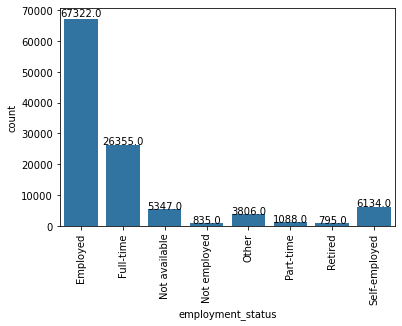

In [25]:
p=sns.countplot(x=loan_data["employment_status"],color=color)
plt.xticks(rotation=90)
show_values(p);

- From the graph above it shows that majority of the borrowers are employed then followed by being self-employed, but the data isn't really clear.

In [26]:
# Creating an order index for the graph
order_e = loan_data.employment_status.value_counts().index
order_e

CategoricalIndex(['Employed', 'Full-time', 'Self-employed', 'Not available',
                  'Other', 'Part-time', 'Not employed', 'Retired'],
                 categories=['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed'], ordered=False, dtype='category')

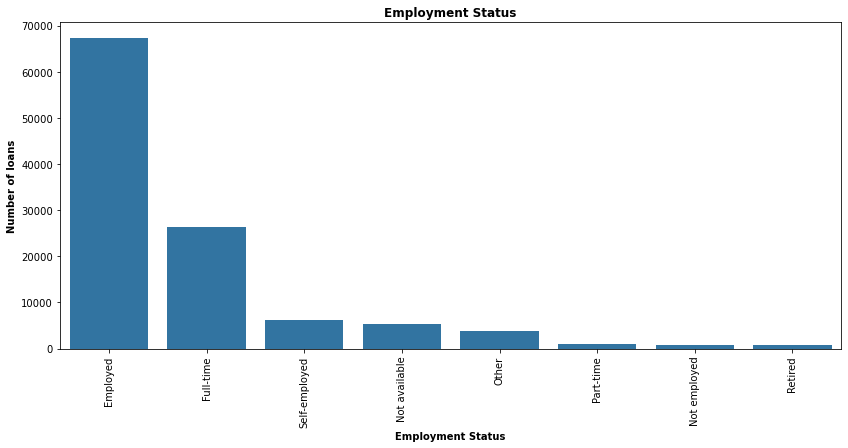

In [27]:
# Plotting the graph
plt.figure(figsize=(14,6))
count_plot(loan_data,loan_data.employment_status,color,order_e)
plt.xlabel("Employment Status", weight = "bold")
plt.ylabel("Number of loans", weight = "bold")
plt.title("Employment Status", weight = "bold")
plt.xticks(rotation=90);

- This shows a better representation of the employment status of the borrowers.
- The number of borrowers were mostly employed at the time they created the listing.
- The least number of people were either part time, not employed or retired by the time the listing was created.

# 2. - BorrowerState
### Code

In [28]:
# understing the values in the borrowerstate column
loan_data.borrower_state.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: borrower_state, dtype: int64

In [29]:
orders_b=loan_data.borrower_state.value_counts().index

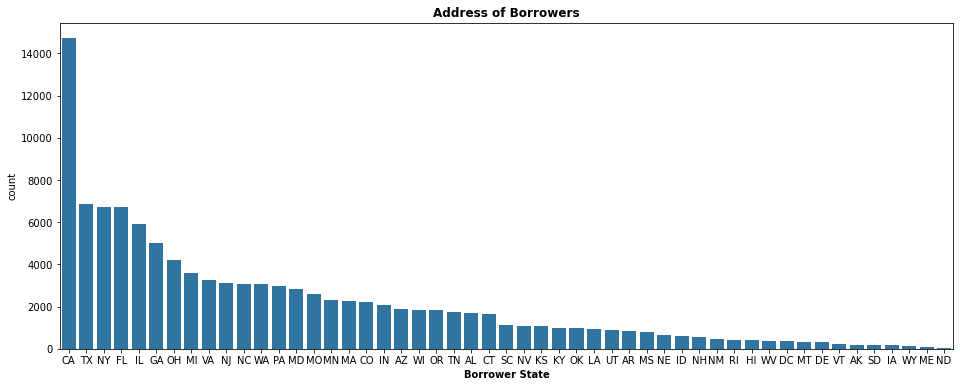

In [30]:
plt.figure(figsize=(16,6))
count_plot(loan_data,loan_data.borrower_state,color,orders_b)
plt.xlabel("Borrower State", weight="bold")
plt.title("Address of Borrowers", weight="bold" );

- This graph shows that the two letter abbreviation of the state of the address of the borrower at the time the Listing was created was mostly in CA(California).

# 3. BorrowerRate
### Code

In [31]:
# Understanding the Borrower's interest rate for this loan.
print(f"The maximum rate for this loan is {loan_data.borrower_rate.max()} and the minimum is {loan_data.borrower_rate.min()} while the average is {loan_data.borrower_rate.mean()}")

The maximum rate for this loan is 0.4975 and the minimum is 0.0 while the average is 0.1927640577687518


In [32]:
loan_data.describe()

,borrower_rate,borrower_apr,term,listingcategory_numeric,credit_scorerange_lower,credit_scorerange_upper,employment_status_duration,statedmonthlyincome,monthlyloanpayment,prosperscore,loancurrentdaysdelinquent
count,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,113346.000000,106312.000000,1.139370e+05,113937.000000,84853.000000,113937.000000
mean,0.192764,0.218828,40.830248,2.774209,685.567731,704.567731,96.071582,5.608026e+03,272.475783,5.950067,152.816539
std,0.074818,0.080364,10.436212,3.996797,66.458275,66.458275,94.480605,7.478497e+03,192.697812,2.376501,466.320254
min,0.000000,0.006530,12.000000,0.000000,0.000000,19.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,0.134000,0.156290,36.000000,1.000000,660.000000,679.000000,26.000000,3.200333e+03,131.620000,4.000000,0.000000
50%,0.184000,0.209760,36.000000,1.000000,680.000000,699.000000,67.000000,4.666667e+03,217.740000,6.000000,0.000000
75%,0.250000,0.283810,36.000000,3.000000,720.000000,739.000000,137.000000,6.825000e+03,371.580000,8.000000,0.000000
max,0.497500,0.512290,60.000000,20.000000,880.000000,899.000000,755.000000,1.750003e+06,2251.510000,11.000000,2704.000000


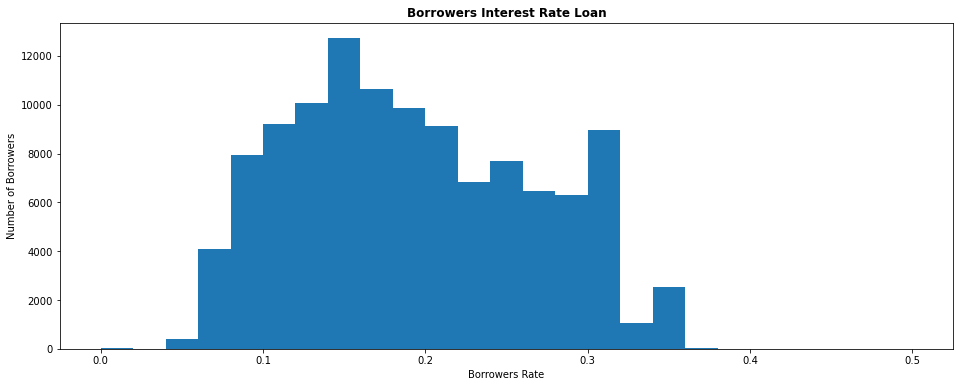

In [33]:
# plotting the graph
plt.figure(figsize=(16,6))
bins = np.arange(0,loan_data.borrower_rate.max()+0.02,0.02)
plt.hist(loan_data.borrower_rate,bins=bins)
plt.title("Borrowers Interest Rate Loan", weight = "bold")
plt.xlabel("Borrowers Rate")
plt.ylabel("Number of Borrowers");

- This graph tells us that are a lot of borrowers rate between 0.1-0.4 and an outlier at the 0.0

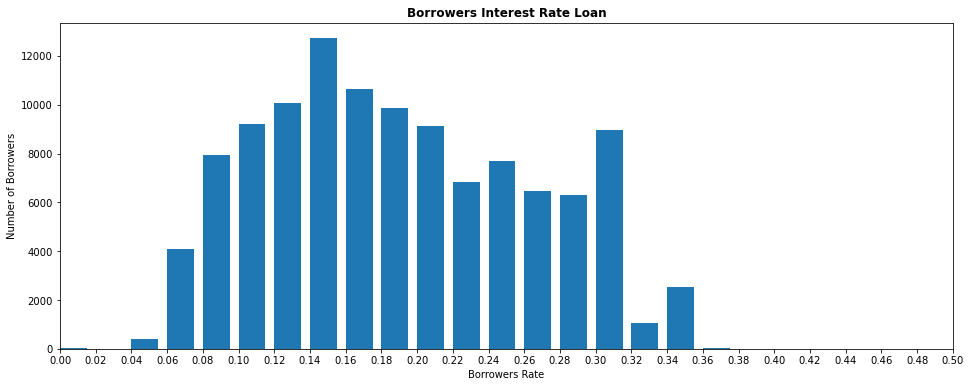

In [34]:
# Taking a deeper look in the graph
plt.figure(figsize=(16,6))
bins = np.arange(0,loan_data.borrower_rate.max()+0.02,0.02)
plt.hist(loan_data.borrower_rate,bins =bins, width=0.015)
plt.title("Borrowers Interest Rate Loan", weight = "bold")
plt.xlabel("Borrowers Rate")
plt.ylabel("Number of Borrowers")
plt.xlim(0.0,0.4)
plt.xticks(np.arange(0,loan_data.borrower_rate.max()+0.02,0.02));

- From this we can see the majority or the interest rate of the loan begins to rise at the 0.04 rate and drop from the 0.14 rate.
- Majority of the borrowers rate interest start from the 0.12 rate to the 0.18 rate with 0.14 to 0.16 rate having the nighest number of borrowers interest rate for the loan.

# 4. Credit Score(CreditScoreRangeLower, CreditScoreRangeUpper)
### Code

In [35]:
loan_data.describe()

,borrower_rate,borrower_apr,term,listingcategory_numeric,credit_scorerange_lower,credit_scorerange_upper,employment_status_duration,statedmonthlyincome,monthlyloanpayment,prosperscore,loancurrentdaysdelinquent
count,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,113346.000000,106312.000000,1.139370e+05,113937.000000,84853.000000,113937.000000
mean,0.192764,0.218828,40.830248,2.774209,685.567731,704.567731,96.071582,5.608026e+03,272.475783,5.950067,152.816539
std,0.074818,0.080364,10.436212,3.996797,66.458275,66.458275,94.480605,7.478497e+03,192.697812,2.376501,466.320254
min,0.000000,0.006530,12.000000,0.000000,0.000000,19.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,0.134000,0.156290,36.000000,1.000000,660.000000,679.000000,26.000000,3.200333e+03,131.620000,4.000000,0.000000
50%,0.184000,0.209760,36.000000,1.000000,680.000000,699.000000,67.000000,4.666667e+03,217.740000,6.000000,0.000000
75%,0.250000,0.283810,36.000000,3.000000,720.000000,739.000000,137.000000,6.825000e+03,371.580000,8.000000,0.000000
max,0.497500,0.512290,60.000000,20.000000,880.000000,899.000000,755.000000,1.750003e+06,2251.510000,11.000000,2704.000000


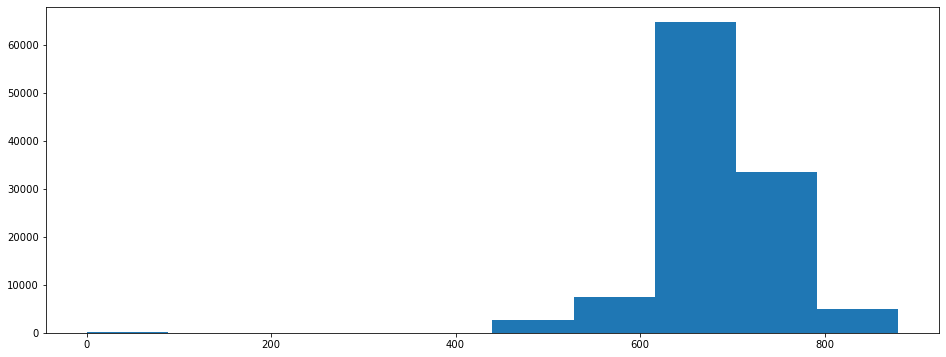

In [36]:
# Handling credit_scorerange_lower
plt.figure(figsize=(16,6))
plt.hist(loan_data.credit_scorerange_lower);

- This graph is more left skewered meaning it is negatively distributed
- It also means that the borrowers intrest rate here is on the high side
- There's also an outlier at zero

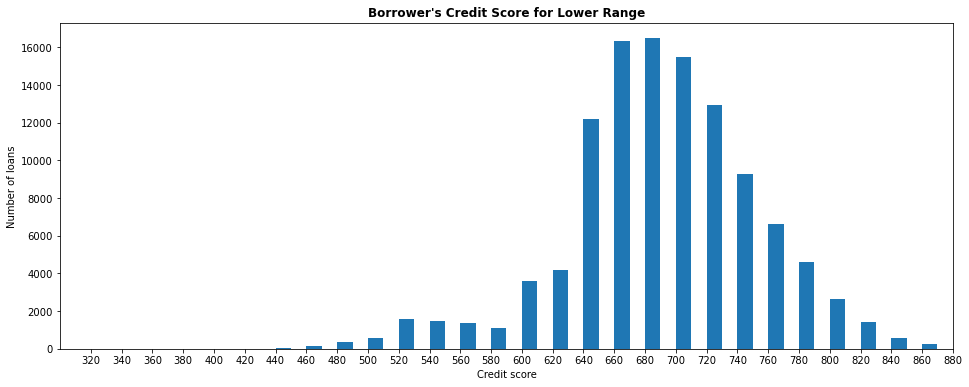

In [37]:
plt.figure(figsize=(16,6))
bins = np.arange(320,loan_data.credit_scorerange_lower.max()+20, 20)
plt.hist(loan_data.credit_scorerange_lower,bins=bins, width = 10)
plt.title("Borrower's Credit Score for Lower Range", weight = "bold")
plt.xlabel("Credit score")
plt.ylabel("Number of loans")
plt.xlim(300,800)
plt.xticks(bins);

- From the graph, this shows that the majority have a higher number of people with a bad credit score

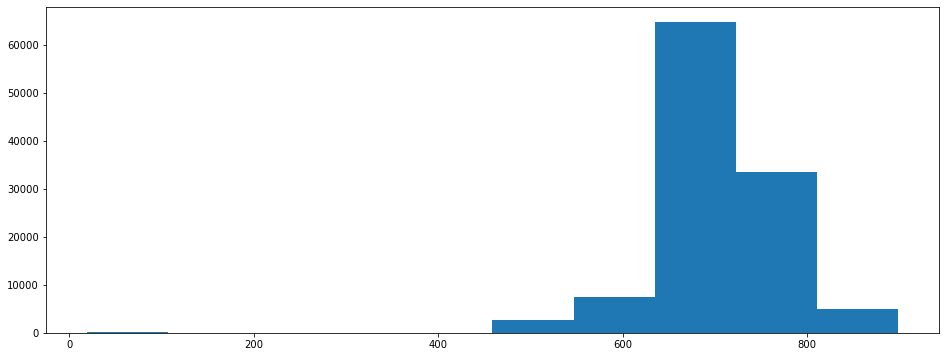

In [38]:
# Handling credit_scorerange_upper
plt.figure(figsize=(16,6))
plt.hist(loan_data.credit_scorerange_upper);

- This graph has similarites to the credit_scorerange_lower distribution

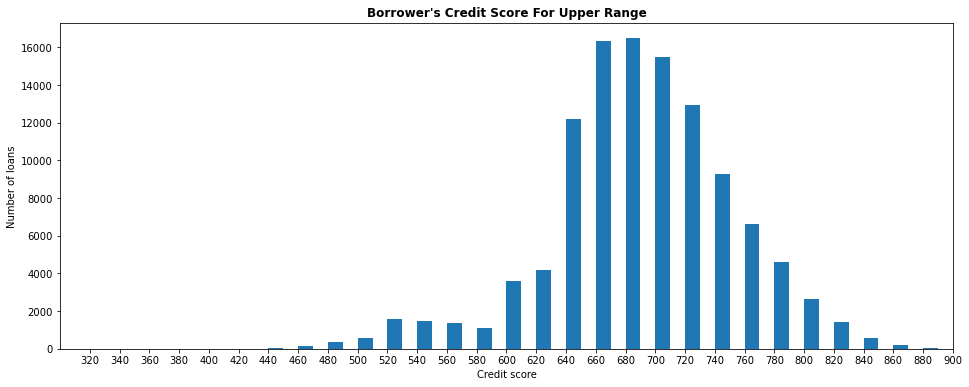

In [39]:
# Taking a deeper look in the credit_scorerange_upper
plt.figure(figsize=(16,6))
bins = np.arange(320,loan_data.credit_scorerange_upper.max()+20, 20)
plt.hist(loan_data.credit_scorerange_upper,bins=bins, width = 10)
plt.title("Borrower's Credit Score For Upper Range", weight = "bold")
plt.xlabel("Credit score")
plt.ylabel("Number of loans")
plt.xlim(300,800)
plt.xticks(bins);

- On first look the graph looks similar to the lower range credit score, but with a deeper insight this shows that there are a higher number of people with a better credit score.

# 5. Type of Loan(ListingCategory (numeric))
### Code

In [40]:
# Viewing the unique value count
loan_data.listingcategory_numeric.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: listingcategory_numeric, dtype: int64

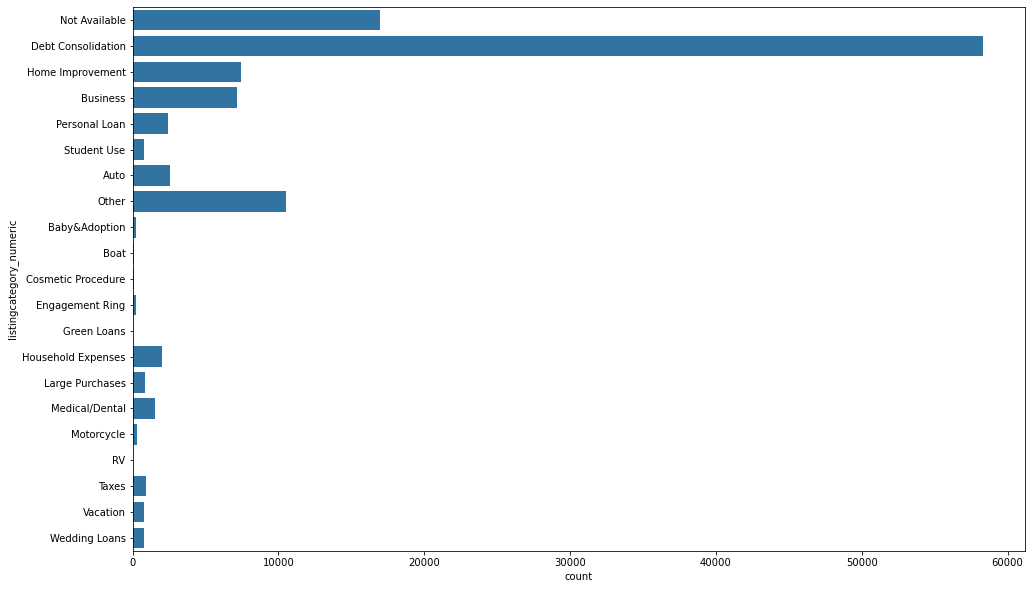

In [41]:
# From the ProsperScore data there are different categories of the listing
# The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation,
#     2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption,
#     9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 
#     14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
category = ["Not Available", "Debt Consolidation", "Home Improvement", "Business", "Personal Loan", "Student Use", "Auto",
            "Other", "Baby&Adoption", "Boat", "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
            "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation", "Wedding Loans"]
plt.figure(figsize=(16,10))
sns.countplot(y=loan_data.listingcategory_numeric,color=color)
ticks = np.arange(0,21,1)
plt.yticks(ticks,category);

- From the graph above, it shows that majority of the borrowers selected Debt consolidaton.

# 6. ProsperScore
### Code


In [42]:
# Knowing the unique value for the data
# A custom risk score built using historical Prosper data. The score ranges from 1-10,
# with 10 being the best, or lowest risk score.Applicable for loans originated after July 2009.
loan_data.prosperscore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: prosperscore, dtype: int64

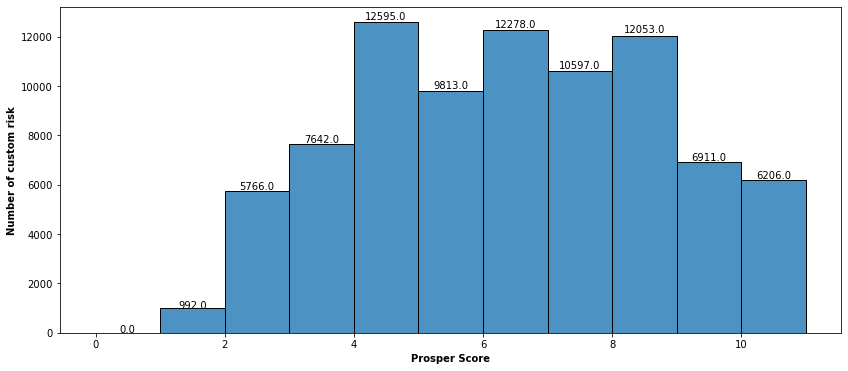

In [43]:
# Plotting the graph
plt.figure(figsize=(14,6))
p=sns.histplot(x=loan_data.prosperscore, alpha =0.8, bins=np.arange(0.0,loan_data.prosperscore.max()+1.0,1.0))
plt.xlabel("Prosper Score", weight = "bold")
plt.ylabel("Number of custom risk", weight = "bold")
show_values(p);

# 7. IncomeRange
### Code

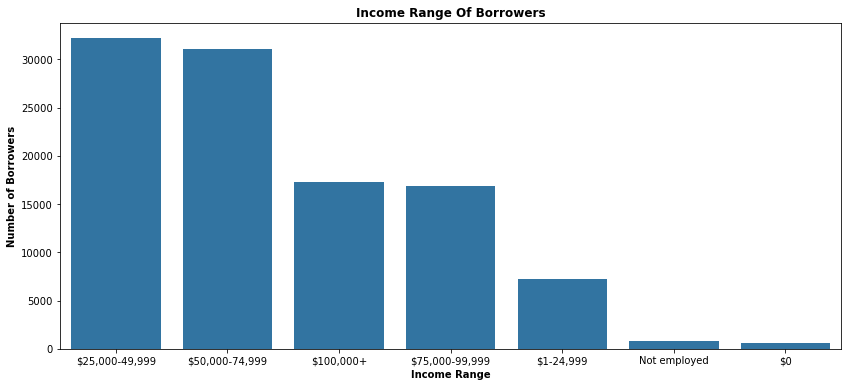

In [44]:
# Plottting the graph without the "Not displayed" section
plt.figure(figsize=(14,6))
sns.countplot(data=loan_data,x="income", color = color)
plt.title("Income Range Of Borrowers", weight = "bold")
plt.xlabel("Income Range", weight = "bold")
plt.ylabel("Number of Borrowers", weight = "bold");

- This graph shows that the income range of most people are from 25,000- 75,000, while a litle ratio are not employed

# 7. LoanCurrentDaysDelinquent
### Code

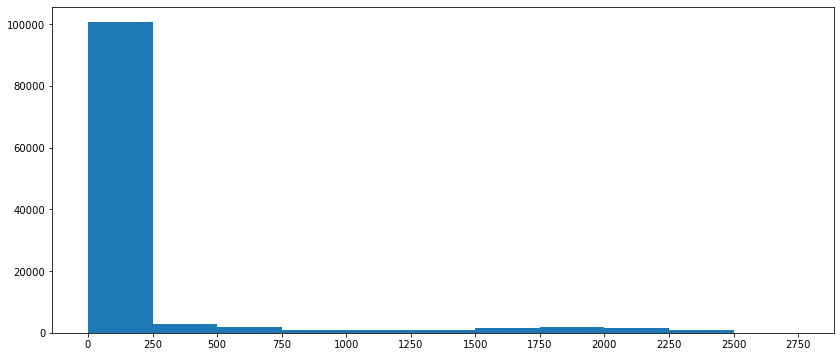

In [45]:
plt.figure(figsize=(14,6))
bins = np.arange(0,loan_data.loancurrentdaysdelinquent.max()+250,250)
plt.hist(loan_data.loancurrentdaysdelinquent,bins=bins)
plt.xticks(bins);

- This graph doesn't really tell us much till we apply the log function

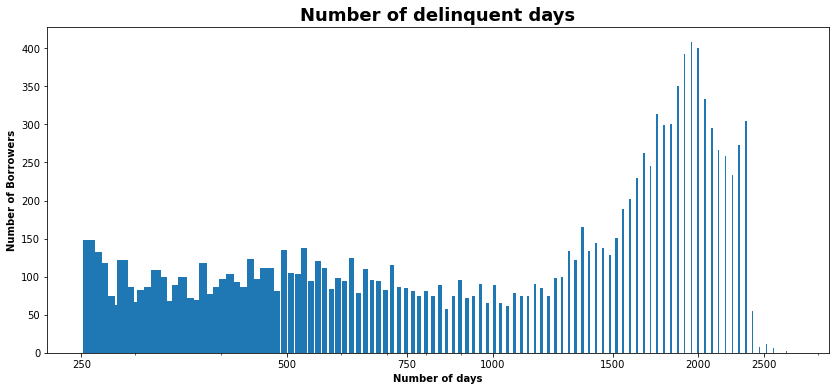

In [46]:
bins = 10 ** np.arange(2.4, np.log10(loan_data.loancurrentdaysdelinquent.max())+0.01, 0.01)

plt.figure(figsize=[14, 6])
plt.hist(loan_data.loancurrentdaysdelinquent, bins = bins, width= 10.5)
plt.xscale("log")
plt.xticks([250, 500, 750, 1000, 1500, 2000, 2500], [250, 500, 750, 1000, 1500, 2000, 2500])
plt.xlabel("Number of days", weight = "bold")
plt.ylabel("Number of Borrowers", weight = "bold")
plt.title("Number of delinquent days", fontsize=18, weight = "bold");

- This graph is a clearer than the first and it shows us that there is an increase in number at the 2000 day

# 8. monthlyloanpayment
### Code

In [47]:
# Getting the statistical summary
loan_data.monthlyloanpayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: monthlyloanpayment, dtype: float64

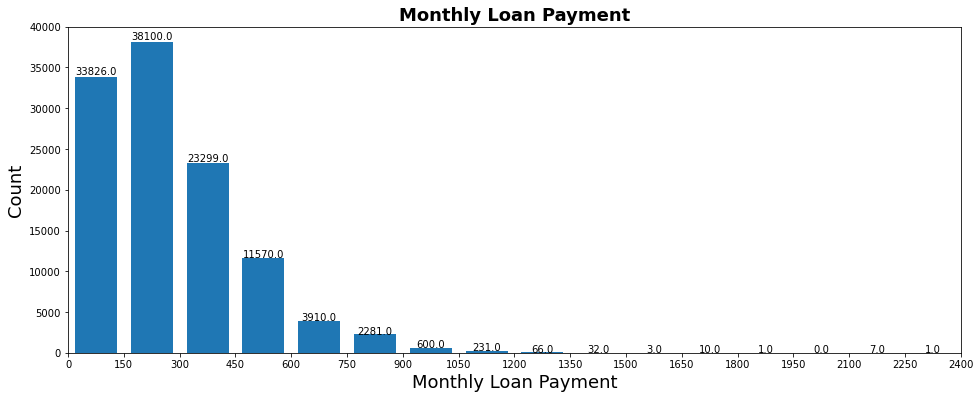

In [48]:
# Plotting the graph
plt.figure(figsize=(16,6))
p=sns.distplot(loan_data.monthlyloanpayment, bins=np.arange(0,loan_data.monthlyloanpayment.max()+150,150),hist_kws={"rwidth":0.75,'alpha':1.0},kde=False)
plt.xlim(0,1500)
plt.title("Monthly Loan Payment", fontsize=18, weight = "bold")
plt.xlabel("Monthly Loan Payment", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(np.arange(0,loan_data.monthlyloanpayment.max()+150,150))
show_values(p);

- The scheduled monthly loan payment in the range of 150 to 300 dollars is the highest concentration range. After 450 dollars, the programmed value of the loan starts to decrease drastically.

# 9. BorrowerAPR
### Code

In [49]:
# Getting the statistical summary
loan_data.borrower_apr.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: borrower_apr, dtype: float64

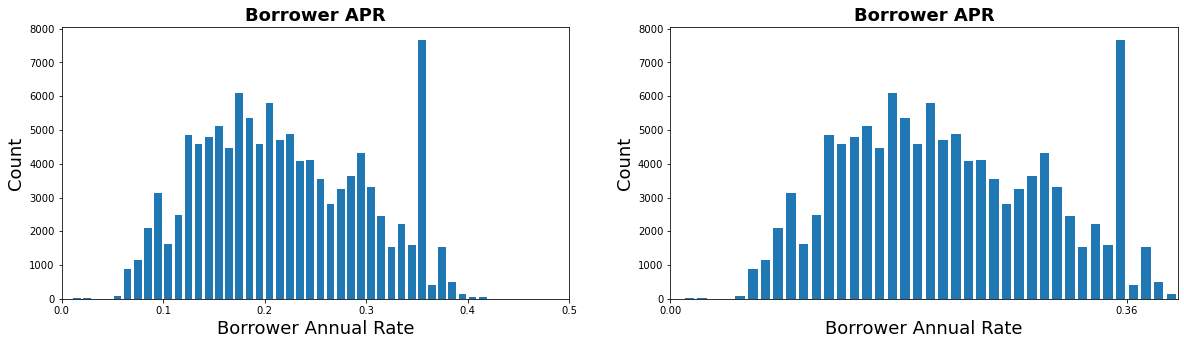

In [50]:
# plotting the graph
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(loan_data.borrower_apr,bins = np.arange(0,loan_data.borrower_apr.max()+0.01,0.01),hist_kws={"rwidth":0.75,'alpha':1.0}, kde=False)
plt.title("Borrower APR", fontsize=18, weight = "bold")
plt.xlabel("Borrower Annual Rate", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xlim(0,0.4)
plt.xticks(np.arange(0,loan_data.borrower_apr.max()+0.01,0.1))

# This plot shows the rate of the large peak
plt.subplot(1,2,2)
sns.distplot(loan_data.borrower_apr,bins = np.arange(0,loan_data.borrower_apr.max()+0.01,0.01),hist_kws={"rwidth":0.75,'alpha':1.0}, kde=False)
plt.title("Borrower APR", fontsize=18, weight = "bold")
plt.xlabel("Borrower Annual Rate", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xlim(0,0.4)
plt.xticks(np.arange(0,loan_data.borrower_apr.max()+0.01,0.36));

- The mean of Annual Percentage Rate is 21%(0.2). 
- There is a large peak in 36%(0.36) and very few loan have an APR greater than 40%(0.4).

# 10.isborrowerhomeowner
### Code

In [51]:
# Getting the count for each unique value 
loan_data.isborrowerhomeowner.value_counts()

True     57478
False    56459
Name: isborrowerhomeowner, dtype: int64

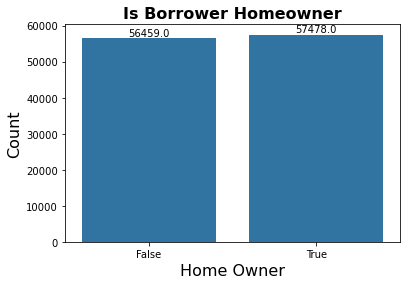

In [52]:
# plotting the graph
p=sns.countplot(data=loan_data, x= "isborrowerhomeowner",color=color)
plt.xlabel("Home Owner", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Is Borrower Homeowner", fontsize=16, weight = "bold")
show_values(p);

There isn't much numeric difference between True and False

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The IncomeRange had a "Not displayed" section, I had to create a new column while excluding the "Not displayed" section for my visualization.
> The LoanCurrentDaysDelinquent colunn had a wide range of values had to use the log function and found that there was a rise in number on the 2000 and the data looked more left skewed when I had a better view

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were needs to rename certain columns as well as convert a few categorical columns into ordered categorical type.

<a id='BE'></a>
# Bivariate Exploration

### Does income range affect prosper score?


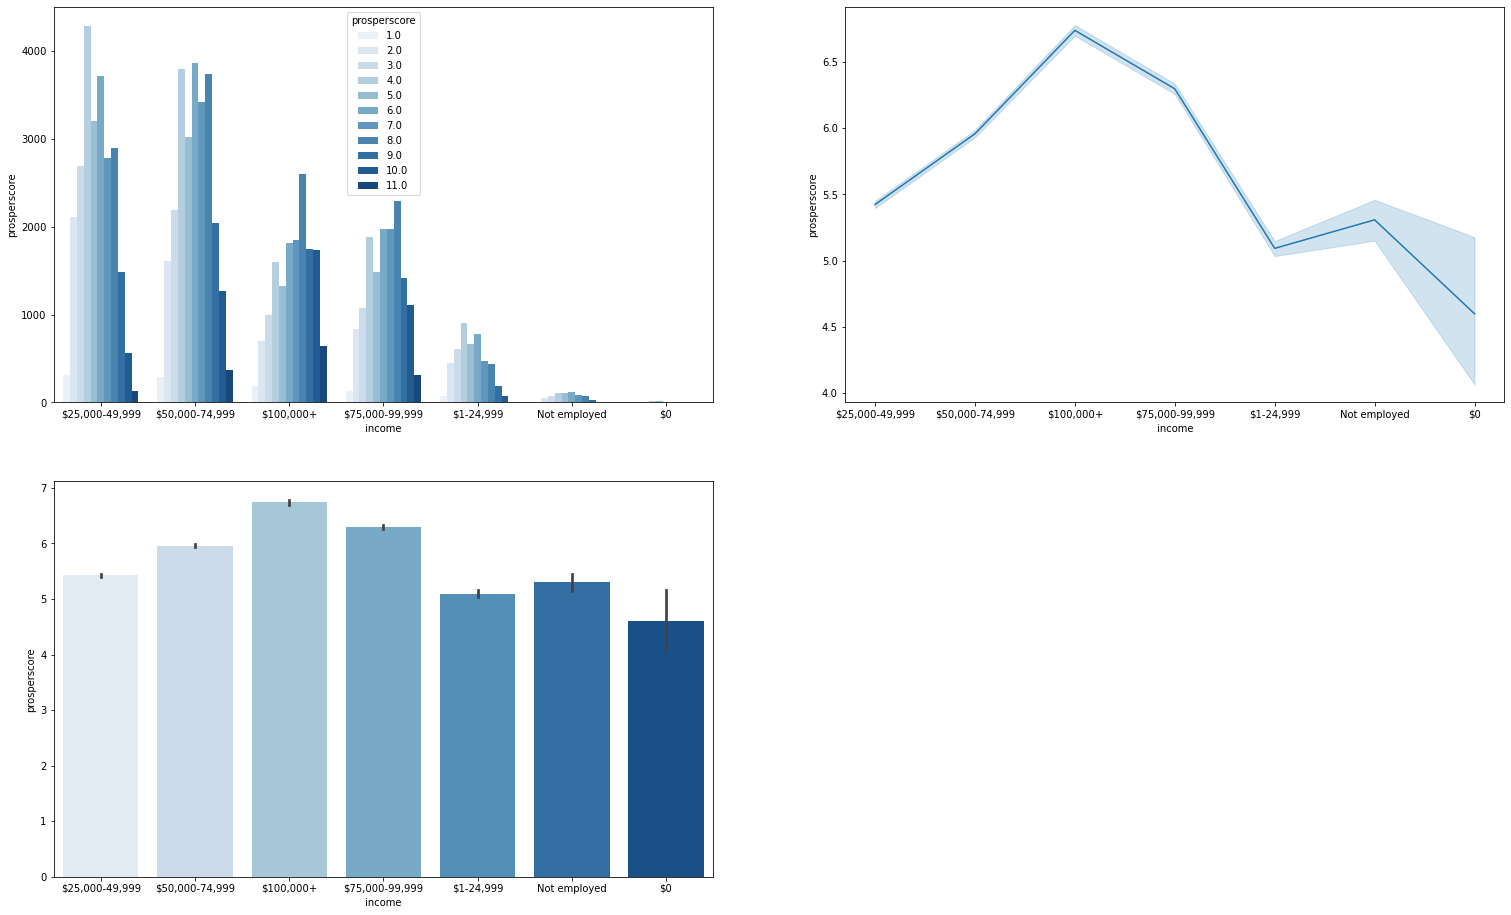

In [53]:
# plotting the graphs to understand the relationships
plt.figure(figsize=(26,16))
plt.subplot(2,2,1)
sns.countplot(data=loan_data,x="income", hue="prosperscore", palette = "Blues")
plt.ylabel("prosperscore")

plt.subplot(2,2,2)
sns.lineplot(data=loan_data,x="income", y="prosperscore", palette = "Blues")

plt.subplot(2,2,3)
sns.barplot(data=loan_data,x="income", y="prosperscore",palette = "Blues");

- This shows that high Prosper score is not necessarily correlated with higher incomes. 

### Relationship between income range and borrowers annual percentage rate

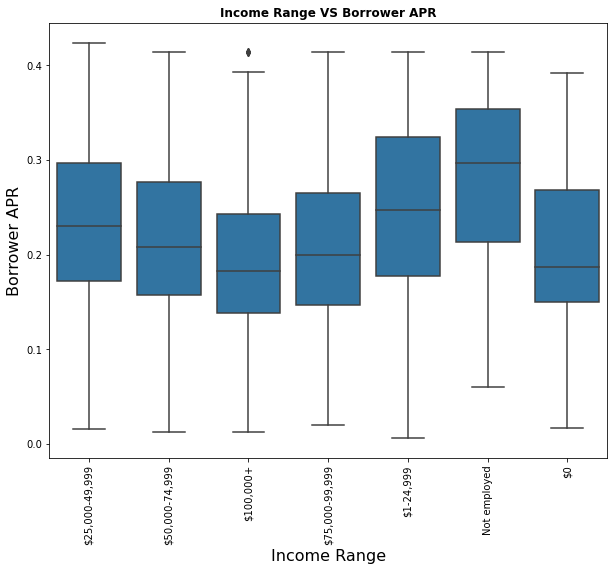

In [54]:
# Relationship between income range and borrower apr
plt.figure(figsize=(10,8))
sns.boxplot(data = loan_data, x = "income", y = "borrower_apr", color = color);
plt.xticks(rotation = 90);
plt.title("Income Range VS Borrower APR", weight = "bold");
plt.xlabel("Income Range", fontsize=16);
plt.ylabel("Borrower APR", fontsize=16);

- The relationship between income range and borrower APR shows that the higher income range the lower APR. There are other values such as zero(0) which are not really an income range and also there is also "Not employed" which has the highest APR

### Relationship between income range and borrowers rate

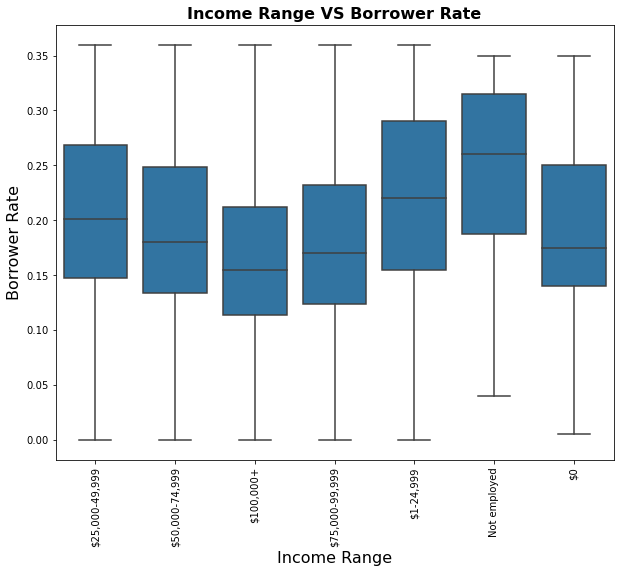

In [55]:
# Relationship between income range and borrowers rate
plt.figure(figsize=(10,8))
sns.boxplot(data = loan_data, x = "income", y = "borrower_rate", color = color);
plt.xticks(rotation = 90);
plt.title("Income Range VS Borrower Rate", fontsize=16, weight = "bold");
plt.xlabel("Income Range", fontsize=16);
plt.ylabel("Borrower Rate", fontsize=16);

- This relationship shows that the higher the income range the lower the borrowers rate. Also, we can see for cases like "Not employed" and zero(0) have a higher borrower rate

### Does Prosperscore and borrower annual percentage rate have any relationship?

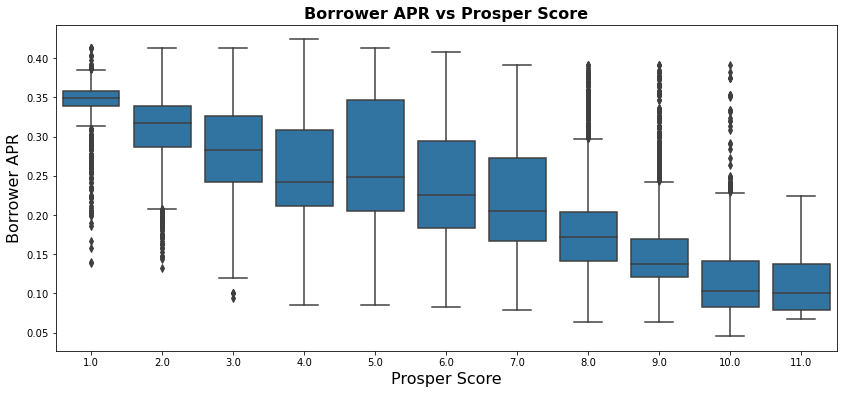

In [56]:
# plotting the graph
plt.figure(figsize=(14,6))
sns.boxplot(data =loan_data, x = "prosperscore", y = "borrower_apr",color = color)
plt.title("Borrower APR vs Prosper Score", fontsize=16, weight = "bold")
plt.xlabel("Prosper Score", fontsize=16)
plt.ylabel("Borrower APR", fontsize=16);

- The correlation here shows that the higher the prosper score the higher borrower annual rate

### Does having a mortgage  on the credit card affect the Borrower's Annual Percentage Rate (APR) for the loan?


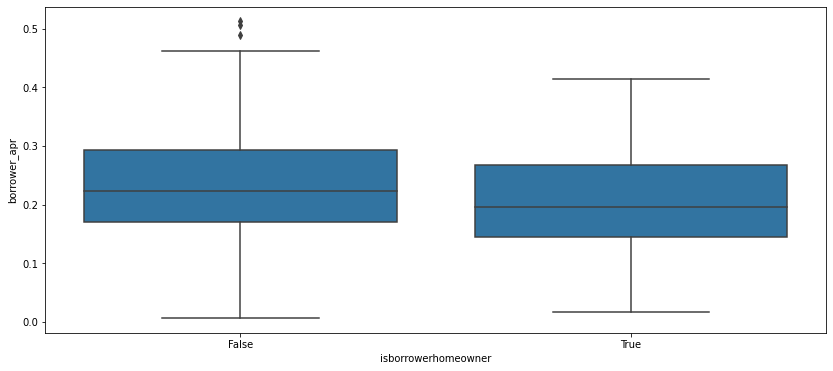

In [57]:
# using a boxplot representation
plt.figure(figsize=(14,6))
sns.boxplot(data = loan_data, x = "isborrowerhomeowner", y = "borrower_apr",color = color);

<Figure size 1440x432 with 0 Axes>

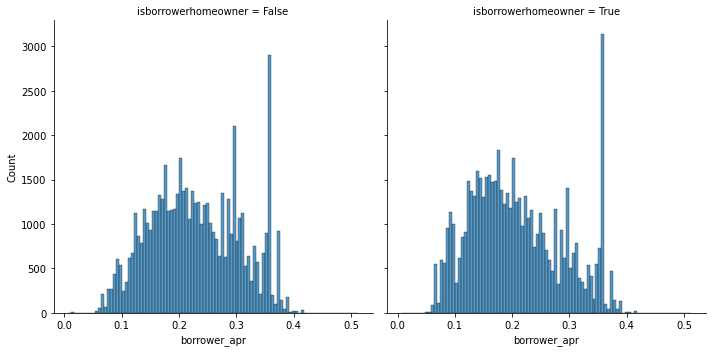

In [58]:
# using a histogram representation with different columns
plt.figure(figsize=(20,6))
sns.displot(data = loan_data, x = "borrower_apr", col = "isborrowerhomeowner");

- Having a mortgage on your credit card slightly affect the borrowers annual percentage rate

### Does Employment status affect borrower rate?

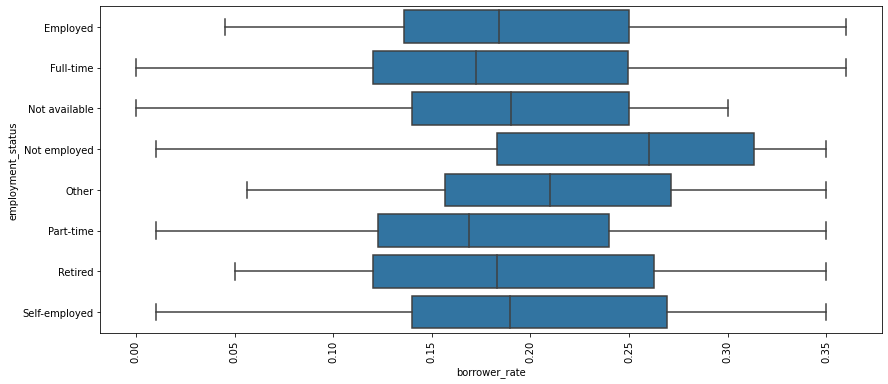

In [59]:
# Using a box plot representation
plt.figure(figsize=(14,6))
sns.boxplot(data = loan_data, y = 'employment_status', x = 'borrower_rate',color = color);
plt.xticks(rotation = 90);

<Figure size 1440x432 with 0 Axes>

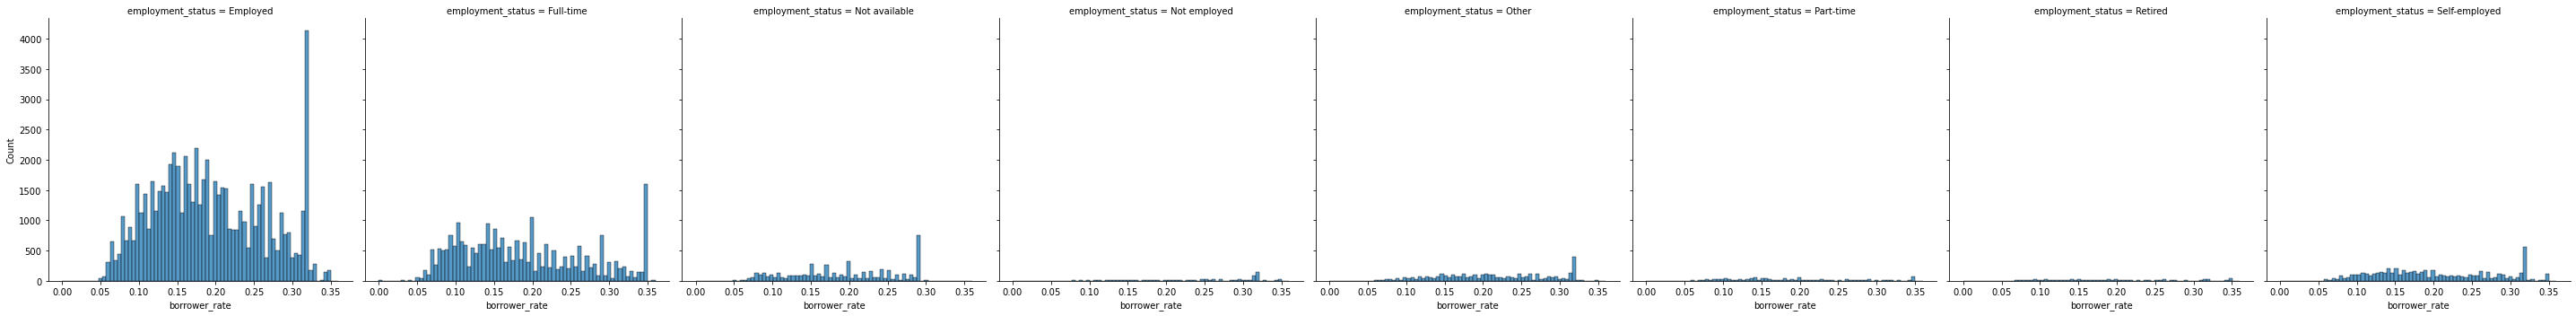

In [60]:
# using a histogram representation with different columns
plt.figure(figsize=(20,6))
sns.displot(data = loan_data, x = "borrower_rate", col = "employment_status");

- This show that employment status affects the borrowers rate.

### Does Occupation affetcs the borrowers rate?

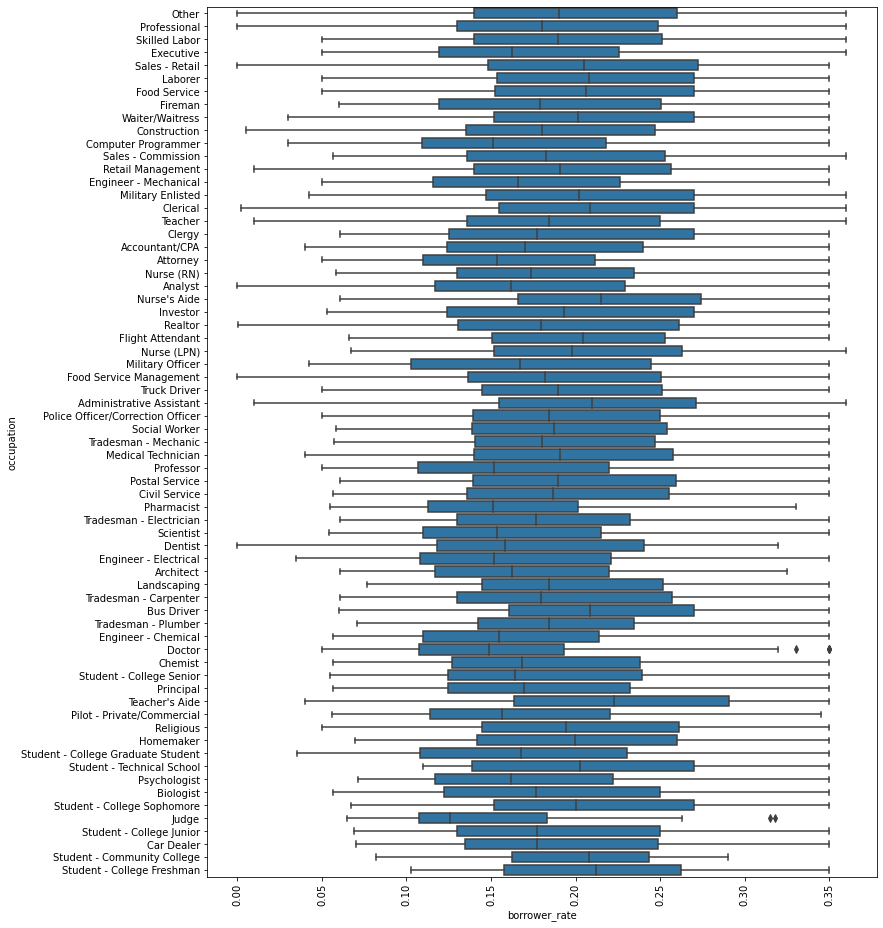

In [61]:
# using a boxplot representation
plt.figure(figsize=(12,16))
sns.boxplot(data = loan_data, y = "occupation", x = "borrower_rate",color = color);
plt.xticks(rotation = 90);

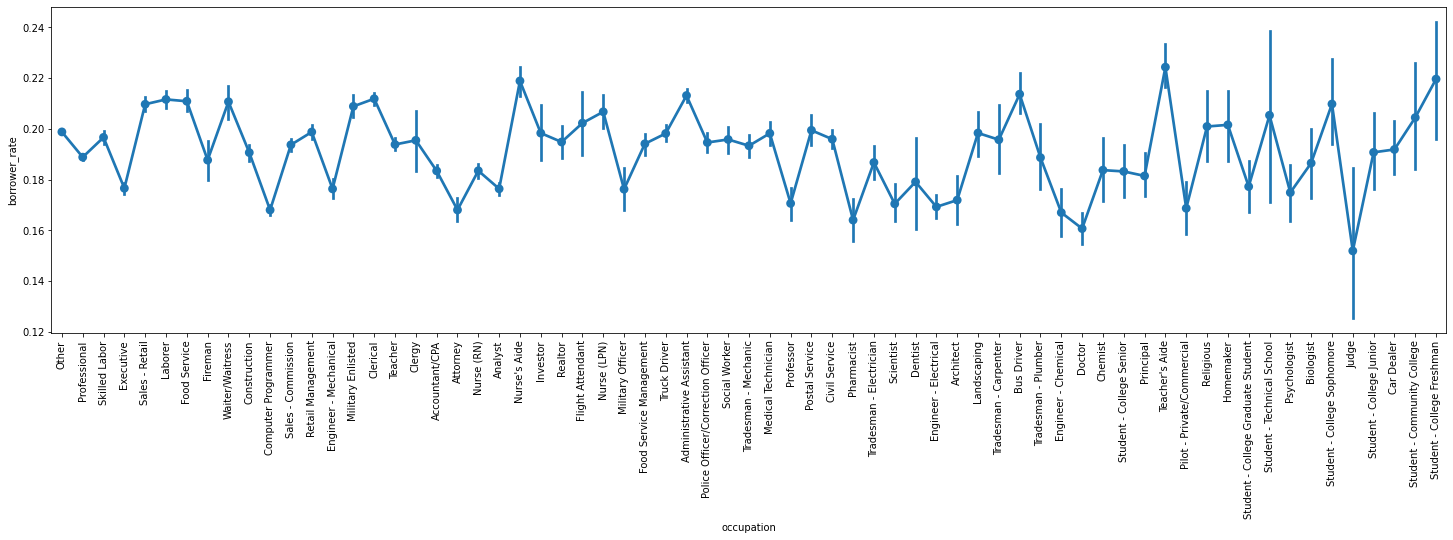

In [62]:
# Using pinplot representation
plt.figure(figsize=(25,6))
sns.pointplot(data = loan_data, x = "occupation", y = "borrower_rate")
plt.xticks(rotation=90);

- This does not really show much relation, it shows that their is a certain range of rate for the occupation sector

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The employment status and borrower rate had an interesting insight, it clearer showed that the employment status of the borrower affects the rate.
- The prosper score isn't necessary related with a high income range.
- Having a mortgage on the credit affects the borrowers annual percentage rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No interesting observation here.

<a id='ME'></a>
# Multivariate Exploration

### Understanding the numeric correlation

In [63]:
# Getting the numeric columns
numeric_corr=loan_data.select_dtypes(include=[np.number])
numeric_corr.columns

Index(['borrower_rate', 'borrower_apr', 'term', 'listingcategory_numeric',
       'credit_scorerange_lower', 'credit_scorerange_upper',
       'employment_status_duration', 'statedmonthlyincome',
       'monthlyloanpayment', 'prosperscore', 'loancurrentdaysdelinquent'],
      dtype='object')

In [64]:
# Getting the numerical features with respect to borrower_rate
correlation=numeric_corr.corr()
print(correlation["borrower_rate"].sort_values(ascending = False), "\n")

borrower_rate                 1.000000
borrower_apr                  0.989824
loancurrentdaysdelinquent     0.136244
listingcategory_numeric       0.102913
term                          0.020085
employment_status_duration   -0.019907
statedmonthlyincome          -0.088982
monthlyloanpayment           -0.244742
credit_scorerange_upper      -0.461567
credit_scorerange_lower      -0.461567
prosperscore                 -0.649736
Name: borrower_rate, dtype: float64 



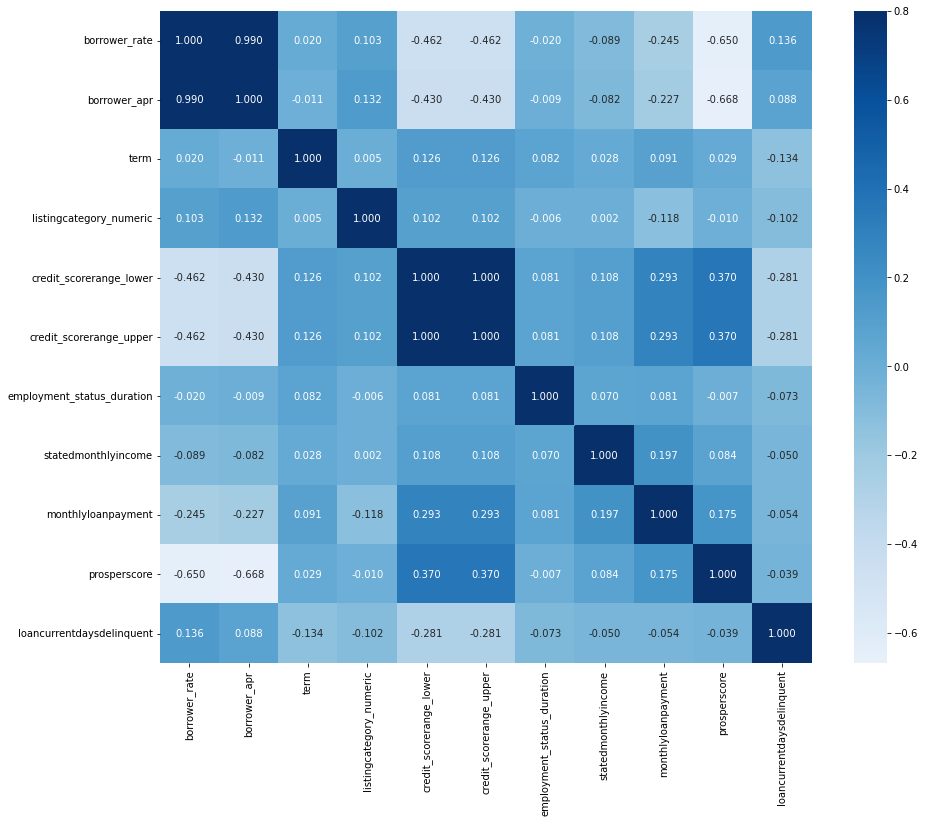

In [65]:
# Using heatmap
plt.figure(figsize=(15,12))
cmap = sns.color_palette("Blues", as_cmap = True)
sns.heatmap(correlation, square = True, vmax=0.8,annot=True, fmt = ".3f",cmap = cmap, center = 0)

- There seems to be a strong correlation between the credit_scorerange_upper and credit_scorerange_lower against the Prosper Score

### Relationship between Income range, Borrower rate and Isborrowerhomeowner

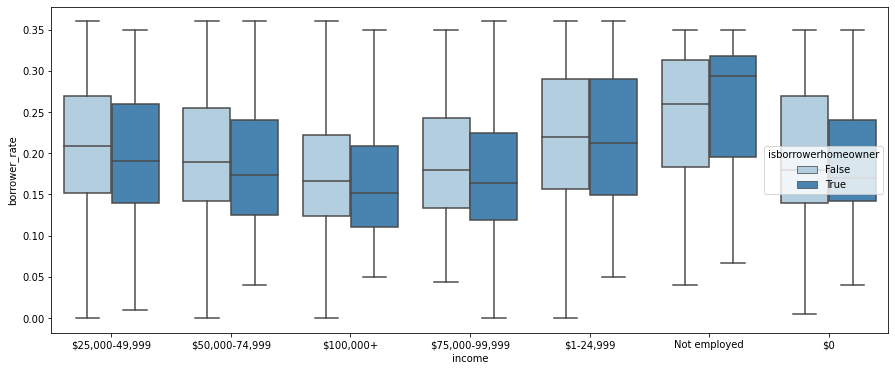

In [66]:
# Plotting the relationships
plt.figure(figsize=(15,6))
sns.boxplot(data=loan_data, x="income", y="borrower_rate", hue="isborrowerhomeowner", palette = "Blues");

This shows that people with higher income range have a lesser borrower rate and people who have mortgage on their credit card(isborrowerhomeowner) have lesser rate also, while people with lesser or no income have a higher rate.This does really apply for the "Not employed" cause, as we can see, those who are not employed and have a mortgage on their credit card still have a higher rate than those who don't have. 

### Relationship between Employment status duration, borrower annual percentage rate and Isborrowerhomeowner

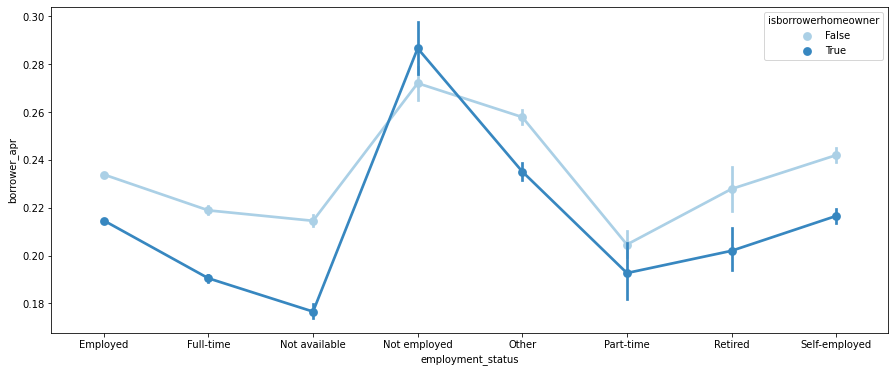

In [67]:
# Plotting the relationships
plt.figure(figsize=(15,6))
sns.pointplot(data = loan_data, x = "employment_status", y = "borrower_apr", hue = "isborrowerhomeowner", palette = "Blues")

- In this relationship, it shows that the employment status tends to affect the borrower annual percentage rate. Someone who is unemployed will have a higher annual percentage rate to pay than someone who is employed.Also, if the person have a mortgage on his/her credit card(isborrowerhomeowner) it also lowers their rate.On the graph, it show us that the lowest rate is "Not available", this may mean that the person may also have an unregistered source of income.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The employment status affects the annual percentage rate.
> The higher the income range also leads to a lower rate and the rate goes lower if the person is a home owner.


### Were there any interesting or surprising interactions between features?

> The interesting finding here is the "Not available" employment status having the lowest rate, this could mean that the person may have an unregistered source of income or something more.